Estimated bacterial growth changes during study time in response to treatment regimes.

## Dataset preperation

In [66]:
library(rtracklayer)
library(ggplot2)
library(zoo)
library(OligoMMR2)

In [67]:
setwd("/home/jovyan/OMM/OMM-AB-Manuscript/")

# Panel A

## lower plot

In [4]:
first_smoothing <- 5000L
cov_smoothing <- 100L

loading the coverage profile

[1] 54748     5

[1] 54254     5

,chr,start,end,width,cov
,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,Akkermansia_muciniphila_YL44,1,50,50,390
2,Akkermansia_muciniphila_YL44,51,100,50,429
3,Akkermansia_muciniphila_YL44,101,150,50,411
4,Akkermansia_muciniphila_YL44,151,200,50,442
5,Akkermansia_muciniphila_YL44,201,250,50,429
6,Akkermansia_muciniphila_YL44,251,300,50,434


Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



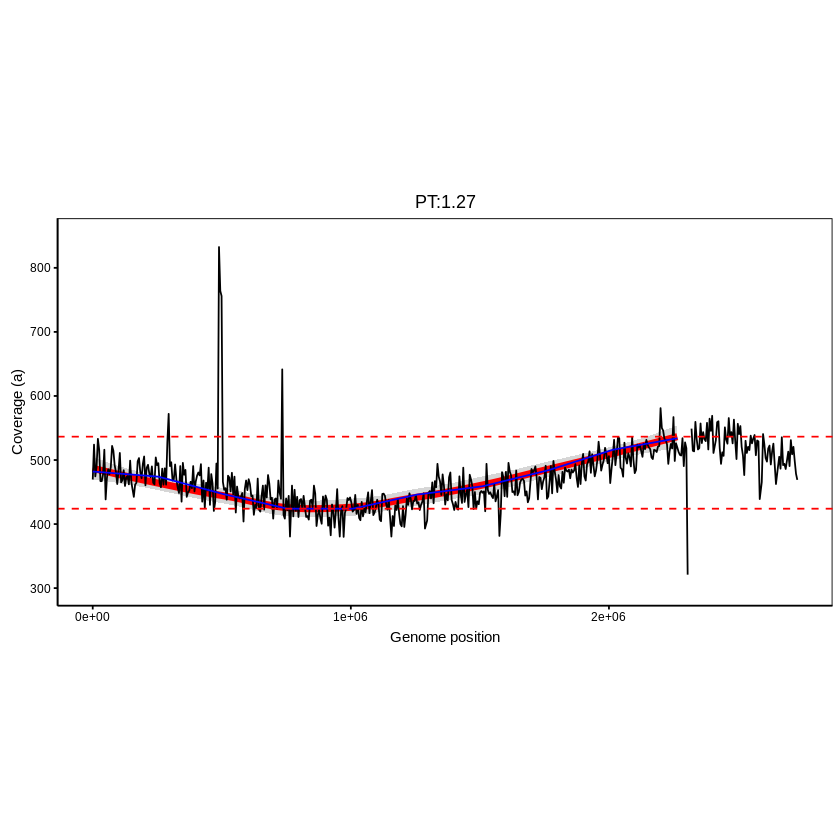

In [24]:
bw_file <- file.path("pipeline_data/bw/coverage_from_pipeline_270721/1699d00_S33.lofreq.bam.bw")
bw <- import(bw_file, format = "bw", as = "NumericList")

elem <- bw[["Akkermansia_muciniphila_YL44"]]

b <- elem[seq(1, length(elem), 50)]
df <- data.frame(chr = "Akkermansia_muciniphila_YL44",
                 start = 1:length(b) * 50L - 50L + 1,
                 end =  1:length(b) * 50L,
                 width = 50,
                 cov = b)
dim(df)
df <- df[which(df$cov > 0),]
dim(df)
head(df)
cov_reduced <- data.frame(start = rollapply(df$start,
                                              width = first_smoothing,
                                              by = first_smoothing,
                                              FUN = min, align = "left"),
                            end = rollapply(df$end,
                                           width = first_smoothing,
                                           by = first_smoothing,
                                           FUN = max, align = "left"),
                            cov = rollapply(df$cov,
                                            width = first_smoothing,
                                            by = first_smoothing,
                                            FUN = median, align = "left"))
cov_reduced2 <- data.frame(start = rollapply(df$start,
                                               width = cov_smoothing,
                                               by = cov_smoothing,
                                               FUN = min, align = "left"),
                             end =rollapply(df$end,
                                            width = cov_smoothing,
                                            by = cov_smoothing,
                                            FUN = max, align = "left"),
                             cov = rollapply(df$cov,
                                             width = cov_smoothing,
                                             by = cov_smoothing,
                                             FUN = median, align = "left"))

cov_reduced_tmp <- cov_reduced
cov_reduced_tmp$timepoint <- "day 0"
cov_reduced_tmp2 <- cov_reduced2
cov_reduced_tmp2$timepoint <- "day 0"

p <- ggplot(cov_reduced, aes(x = start,  y = cov ))
p <- p + geom_smooth(formular = y ~ x + I(x^2), color = "red", size = 2)
ld <- layer_data(p)
ld <- ld[c(which.max(ld$y), which.min(ld$y)), ]
p <- p + geom_line(data = cov_reduced2, aes(x = start, y = cov), size = .5)
p <- p + geom_line(data = cov_reduced, aes(x = start, y = cov), size = .5, color = "blue")
p <- p + theme_pmuench(base_size = 9)
p <- p + scale_y_log10() + ylim(300, 850)
p <- p + theme(aspect.ratio = .5, strip.background = element_blank(), strip.placement = "outside")

p <- p + ggtitle(paste0("PT:",
                      round(max(ld$y) / min(ld$y), digits= 2)))
p <- p + xlab("Genome position") + ylab("Coverage (a)")
p <- p + geom_hline(yintercept = ld$y, linetype = 2, color = "red", size = .5)
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))
p

In [25]:
pdf("R/figures/Figure3_panela_upper.pdf", width = 3.5, height = 2.5)
print(p)
dev.off()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



png 
  2

## upper plot

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



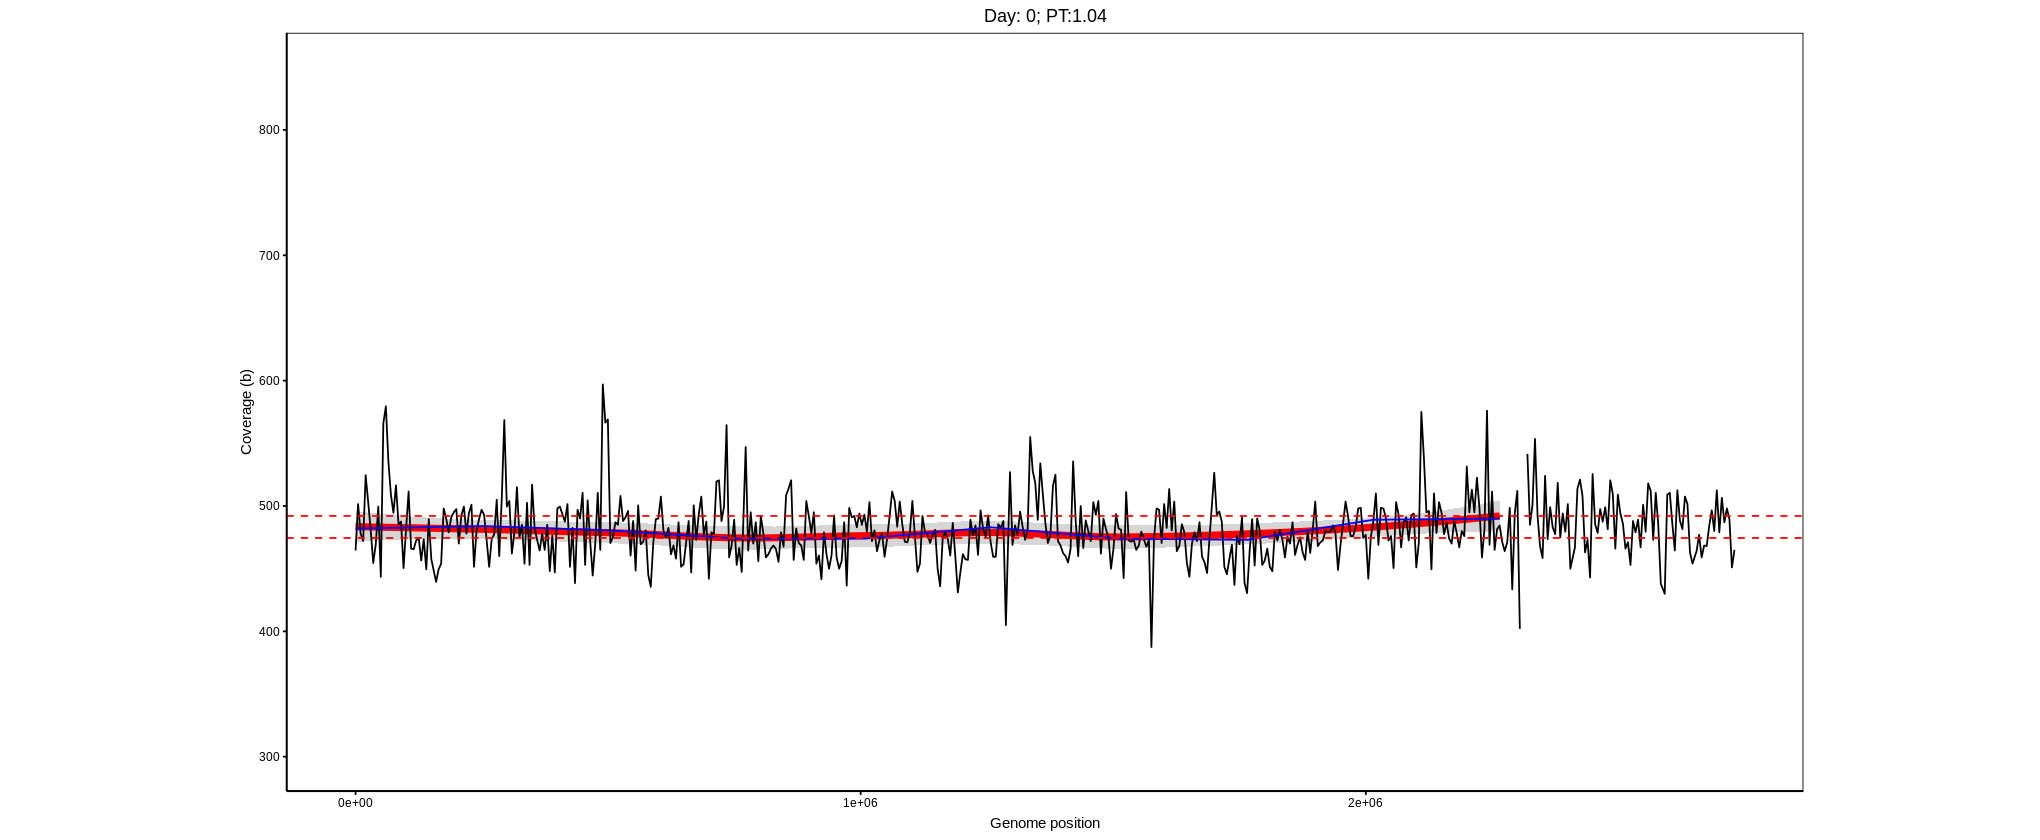

In [114]:
bw_file <- file.path("pipeline_data/bw/coverage_from_pipeline_270721/1699d09_S35.lofreq.bam.bw")
bw <- import(bw_file, format = "bw", as = "NumericList")
elem <- bw[["Akkermansia_muciniphila_YL44"]]

b <- elem[seq(1, length(elem), 50)]
df <- data.frame(chr = "Akkermansia_muciniphila_YL44",
                 start = 1:length(b) * 50L - 50L + 1,
                 end =  1:length(b) * 50L,
                 width = 50,
                 cov = b)

df <- df[which(df$cov > 0),]

cov_reduced <- data.frame(start = rollapply(df$start,
                                              width = first_smoothing,
                                              by = first_smoothing,
                                              FUN = min, align = "left"),
                            end = rollapply(df$end,
                                           width = first_smoothing,
                                           by = first_smoothing,
                                           FUN = max, align = "left"),
                            cov = rollapply(df$cov,
                                            width = first_smoothing,
                                            by = first_smoothing,
                                            FUN = median, align = "left"))
cov_reduced2 <- data.frame(start = rollapply(df$start,
                                               width = cov_smoothing,
                                               by = cov_smoothing,
                                               FUN = min, align = "left"),
                             end =rollapply(df$end,
                                            width = cov_smoothing,
                                            by = cov_smoothing,
                                            FUN = max, align = "left"),
                             cov = rollapply(df$cov,
                                             width = cov_smoothing,
                                             by = cov_smoothing,
                                             FUN = median, align = "left"))


cov_reduced$timepoint <- "day 9"
cov_reduced2$timepoint <- "day 9"

p <- ggplot(cov_reduced, aes(x = start, y = cov))
p <- p + geom_smooth(formular = y ~ x + I(x^2), color = "red", size = 2)

ld <- layer_data(p)
ld <- ld[c(which.max(ld$y), which.min(ld$y)), ]

p <- p + geom_line(data = cov_reduced2, aes(x = start, y = cov), size = .5)
p <- p + geom_line(data = cov_reduced, aes(x = start, y = cov), size = .5, color = "blue")
p <- p + xlab("Genome position") + ylab("Coverage (b)")
p <- p + scale_y_log10() + ylim(300, 850)
p <- p + theme_pmuench(base_size = 9)
p <- p + theme(aspect.ratio = .5, strip.background = element_blank(), strip.placement = "outside")

p <- p + ggtitle(paste0("Day: ", 0, "; PT:",
                          round(max(ld$y) / min(ld$y), digits= 2)))
p <- p + geom_hline(yintercept = ld$y, linetype = 2, color = "red", size = .5)
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))

p

In [23]:
pdf("R/figures/Figure3_panela_lower.pdf", width = 3.5, height = 2.5)
print(p)
dev.off()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



png 
  2

In [17]:
bw_file <- file.path("pipeline_data/bw/coverage_from_pipeline_270721/1681d00_S56.lofreq.bam.bw")
bw <- import(bw_file, format = "bw", as = "NumericList")
names(bw)

[1] "Acutalibacter_muris_KB18"            "Akkermansia_muciniphila_YL44"       
 [3] "Bacteroides_caecimuris_I48"          "Bifidobacterium_animalis_YL2"       
 [5] "Blautia_coccoides_YL58"              "Clostridium_innocuum_I46"           
 [7] "Enterocloster_clostridioformis_YL32" "Enterococcus_faecalis_KB1"          
 [9] "Flavonifractor_plautii_YL31"         "Limosilactobacillus_reuteri_I49"    
[11] "Muribaculum_intestinale_YL27"        "Turicimonas_muris_YL45"

# Panel B

In [27]:
p2r <- list()
files <- list.files("pipeline_data/bw/coverage_from_pipeline_270721/", full.names = T)


bugs <- c("Akkermansia_muciniphila_YL44")

for (sample in files){
    message(sample)
    bw_file <- file.path(sample)
    bw <- import(bw_file, format = "bw", as = "NumericList")
    
    for (bug in bugs){
        elem <- bw[[bug]]
        b <- elem[seq(1, length(elem), 50)]
        df <- data.frame(chr = bug,
                         start = 1:length(b) * 50L - 50L + 1,
                         end =  1:length(b) * 50L,
                         width = 50,
                         cov = b)

        cov_reduced <- data.frame(start = rollapply(df$start,
                                                      width = first_smoothing,
                                                      by = first_smoothing,
                                                      FUN = min, align = "left"),
                                    end = rollapply(df$end,
                                                   width = first_smoothing,
                                                   by = first_smoothing,
                                                   FUN = max, align = "left"),
                                    cov = rollapply(df$cov,
                                                    width = first_smoothing,
                                                    by = first_smoothing,
                                                    FUN = median, align = "left"))
        cov_reduced2 <- data.frame(start = rollapply(df$start,
                                                       width = cov_smoothing,
                                                       by = cov_smoothing,
                                                       FUN = min, align = "left"),
                                     end =rollapply(df$end,
                                                    width = cov_smoothing,
                                                    by = cov_smoothing,
                                                    FUN = max, align = "left"),
                                     cov = rollapply(df$cov,
                                                     width = cov_smoothing,
                                                     by = cov_smoothing,
                                                     FUN = median, align = "left"))

        p <- ggplot(cov_reduced, aes(x = start, y = cov))
        p <- p + geom_smooth(formular = y ~ x + I(x^2), color = "red", size = 2)
        ld <- layer_data(p)
        ld <- ld[c(which.max(ld$y), which.min(ld$y)), ]
        if(median(cov_reduced2$cov) <= 10) {
            message("low coverage")
             p2r[[paste0(sample, bug)]] <-  data.frame(ratio = -1,
                                    bug = bug,
                                    mouse.id = substr(tools::file_path_sans_ext(basename(sample)), 1, 4),
                                    mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(sample)), 1, 4)),
                                    day = as.integer(substr(basename(sample), 6, 7)),
                                    phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(sample), 6, 7))))),
                                    phase_num = binDaysByPhaseGroup(as.integer(substr(basename(sample), 6, 7))))
        } else {
              p2r[[paste0(sample, bug)]] <- data.frame(ratio = round(max(ld$y) / min(ld$y), digits= 2),
                                    bug = bug,
                                    mouse.id = substr(tools::file_path_sans_ext(basename(sample)), 1, 4),
                                    mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(sample)), 1, 4)),
                                    day = as.integer(substr(basename(sample), 6, 7)),
                                    phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(sample), 6, 7))))),
                                    phase_num = binDaysByPhaseGroup(as.integer(substr(basename(sample), 6, 7))))
        }
    } 
    
  
}
p2rdf <- do.call("rbind", p2r)
head(p2rdf)

pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bw

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


pipeline_data/bw/coverage_from_pipeline_270721//1681d14_S57.lofreq.

,ratio,bug,mouse.id,mouse.group,day,phase,phase_num
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.27,Akkermansia_muciniphila_YL44,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d14_S57.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.28,Akkermansia_muciniphila_YL44,1681,Control,14,short-recovery,2
pipeline_data/bw/coverage_from_pipeline_270721//1681d30_S58.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.21,Akkermansia_muciniphila_YL44,1681,Control,30,short-recovery,4
pipeline_data/bw/coverage_from_pipeline_270721//1681d49_S59.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.25,Akkermansia_muciniphila_YL44,1681,Control,49,long-recovery,3
pipeline_data/bw/coverage_from_pipeline_270721//1681d63_S60.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.25,Akkermansia_muciniphila_YL44,1681,Control,63,short-recovery,6
pipeline_data/bw/coverage_from_pipeline_270721//1681d79_S61.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.25,Akkermansia_muciniphila_YL44,1681,Control,79,short-recovery,8


In [28]:
p2rdf <- p2rdf[which(p2rdf$ratio != -1),]

In [29]:
p2rdf_subset <- p2rdf[which(p2rdf$day == 9),]
head(p2rdf_subset)

,ratio,bug,mouse.id,mouse.group,day,phase,phase_num
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
pipeline_data/bw/coverage_from_pipeline_270721//1683d09_S49.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.17,Akkermansia_muciniphila_YL44,1683,Control,9,short-recovery,1
pipeline_data/bw/coverage_from_pipeline_270721//1688d09_S3.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.21,Akkermansia_muciniphila_YL44,1688,Ciprofloxacin,9,short-recovery,1
pipeline_data/bw/coverage_from_pipeline_270721//1692d09_S19.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.13,Akkermansia_muciniphila_YL44,1692,Tetracyclin,9,short-recovery,1
pipeline_data/bw/coverage_from_pipeline_270721//1699d09_S35.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.03,Akkermansia_muciniphila_YL44,1699,Vancomycin,9,short-recovery,1


,ratio,bug,mouse.id,mouse.group,day,phase,phase_num
,<dbl>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.27,Akkermansia_muciniphila_YL44,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d14_S57.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.28,Akkermansia_muciniphila_YL44,1681,Control,14,short-recovery,2
pipeline_data/bw/coverage_from_pipeline_270721//1681d30_S58.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.21,Akkermansia_muciniphila_YL44,1681,Control,30,short-recovery,4
pipeline_data/bw/coverage_from_pipeline_270721//1681d49_S59.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.25,Akkermansia_muciniphila_YL44,1681,Control,49,long-recovery,3
pipeline_data/bw/coverage_from_pipeline_270721//1681d63_S60.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.25,Akkermansia_muciniphila_YL44,1681,Control,63,short-recovery,6
pipeline_data/bw/coverage_from_pipeline_270721//1681d79_S61.lofreq.bam.bwAkkermansia_muciniphila_YL44,1.25,Akkermansia_muciniphila_YL44,1681,Control,79,short-recovery,8


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


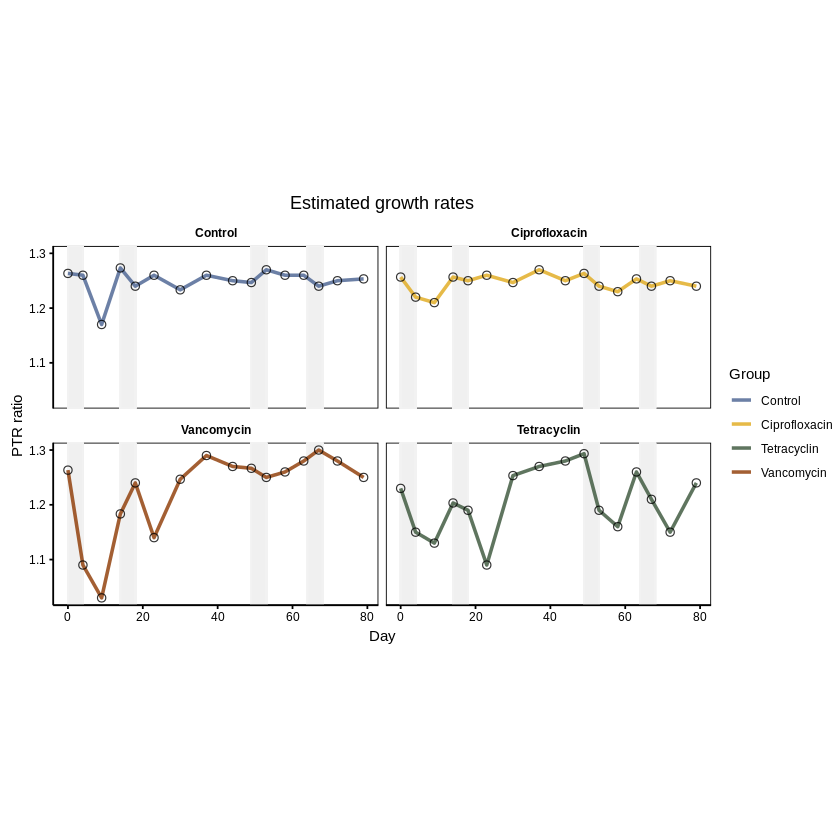

In [37]:
p2rdf$mouse.group <- factor(p2rdf$mouse.group, levels = c("Control",
                                                          "Ciprofloxacin",
                                                          "Vancomycin",
                                                         "Tetracyclin"))

head(p2rdf)
p2rdf_agg <- aggregate(ratio ~ day + mouse.group,
                            FUN = "mean",
                            data = p2rdf)

p <- ggplot(data = p2rdf_agg, aes(x = day, y = ratio, color = mouse.group))


p <- p + facet_wrap(mouse.group ~ .)
p <- p + geom_rect(xmin = 0, xmax = 4,ymin = -Inf, ymax = Inf, color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 14, xmax = 18,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 49, xmax = 53,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 64, xmax = 68,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_line(size = 1, alpha =.8) + geom_point(size = 2, color = "black", shape = 21, alpha =.8)
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p <- p + theme_pmuench(base_size = 9)


p <- p + theme(aspect.ratio = .5, strip.background = element_blank(), strip.placement = "outside")
p <- p + xlab("Day") + ylab("PTR ratio")
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))
p <- p + ggtitle(paste0("Estimated growth rates"))
p <- p + theme(aspect.ratio = .5)
p

In [40]:
pdf("R/figures/Figure3_panelb.pdf", width = 6.5, height = 5.5)
print(p)
dev.off()

png 
  2

# Panel C

In [41]:
p2r <- list()
files <- list.files("pipeline_data/bw/coverage_from_pipeline_270721/", full.names = T)


bugs <- c("Bacteroides_caecimuris_I48", "Blautia_coccoides_YL58", "Clostridium_innocuum_I46",
          "Enterocloster_clostridioformis_YL32", "Flavonifractor_plautii_YL31", "Limosilactobacillus_reuteri_I49")
#samples <- c("pipeline_data/bw/coverage_from_pipeline_270721/1683d09_S49.lofreq.bam.bw")

for (sample in files){
    message(sample)
    bw_file <- file.path(sample)
    bw <- import(bw_file, format = "bw", as = "NumericList")
    
    for (bug in bugs){
        elem <- bw[[bug]]
        b <- elem[seq(1, length(elem), 50)]
        df <- data.frame(chr = bug,
                         start = 1:length(b) * 50L - 50L + 1,
                         end =  1:length(b) * 50L,
                         width = 50,
                         cov = b)

        cov_reduced <- data.frame(start = rollapply(df$start,
                                                      width = first_smoothing,
                                                      by = first_smoothing,
                                                      FUN = min, align = "left"),
                                    end = rollapply(df$end,
                                                   width = first_smoothing,
                                                   by = first_smoothing,
                                                   FUN = max, align = "left"),
                                    cov = rollapply(df$cov,
                                                    width = first_smoothing,
                                                    by = first_smoothing,
                                                    FUN = median, align = "left"))
        cov_reduced2 <- data.frame(start = rollapply(df$start,
                                                       width = cov_smoothing,
                                                       by = cov_smoothing,
                                                       FUN = min, align = "left"),
                                     end =rollapply(df$end,
                                                    width = cov_smoothing,
                                                    by = cov_smoothing,
                                                    FUN = max, align = "left"),
                                     cov = rollapply(df$cov,
                                                     width = cov_smoothing,
                                                     by = cov_smoothing,
                                                     FUN = median, align = "left"))

        p <- ggplot(cov_reduced, aes(x = start, y = cov))
        p <- p + geom_smooth(formular = y ~ x + I(x^2), color = "red", size = 2)
        ld <- layer_data(p)
        ld <- ld[c(which.max(ld$y), which.min(ld$y)), ]
        if(median(cov_reduced2$cov) <= 10) {
            message("low coverage")
             p2r[[paste0(sample, bug)]] <-  data.frame(ratio = -1,
                                    bug = bug,
                                    mouse.id = substr(tools::file_path_sans_ext(basename(sample)), 1, 4),
                                    mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(sample)), 1, 4)),
                                    day = as.integer(substr(basename(sample), 6, 7)),
                                    phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(sample), 6, 7))))),
                                    phase_num = binDaysByPhaseGroup(as.integer(substr(basename(sample), 6, 7))))
        } else {
              p2r[[paste0(sample, bug)]] <- data.frame(ratio = round(max(ld$y) / min(ld$y), digits= 2),
                                    bug = bug,
                                    mouse.id = substr(tools::file_path_sans_ext(basename(sample)), 1, 4),
                                    mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(sample)), 1, 4)),
                                    day = as.integer(substr(basename(sample), 6, 7)),
                                    phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(sample), 6, 7))))),
                                    phase_num = binDaysByPhaseGroup(as.integer(substr(basename(sample), 6, 7))))
        }
    } 
    
  
}
p2rdf <- do.call("rbind", p2r)
head(p2rdf)

pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bw

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

low coverage

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

low coverage

pipeline_data/bw/coverage_from_pipeline_270721//1681d14_S57.lofreq.bam.bw

Warning message:
“Ignoring unknown parameters: formular”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

War

,ratio,bug,mouse.id,mouse.group,day,phase,phase_num
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwBacteroides_caecimuris_I48,1.30,Bacteroides_caecimuris_I48,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwBlautia_coccoides_YL58,1.36,Blautia_coccoides_YL58,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwClostridium_innocuum_I46,-1.00,Clostridium_innocuum_I46,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwEnterocloster_clostridioformis_YL32,1.33,Enterocloster_clostridioformis_YL32,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwFlavonifractor_plautii_YL31,1.13,Flavonifractor_plautii_YL31,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwLimosilactobacillus_reuteri_I49,-1.00,Limosilactobacillus_reuteri_I49,1681,Control,0,pre-treatment,1


In [42]:
head(p2rdf)
p2rdf <- p2rdf[which(p2rdf$ratio != -1),]

,ratio,bug,mouse.id,mouse.group,day,phase,phase_num
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwBacteroides_caecimuris_I48,1.30,Bacteroides_caecimuris_I48,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwBlautia_coccoides_YL58,1.36,Blautia_coccoides_YL58,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwClostridium_innocuum_I46,-1.00,Clostridium_innocuum_I46,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwEnterocloster_clostridioformis_YL32,1.33,Enterocloster_clostridioformis_YL32,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwFlavonifractor_plautii_YL31,1.13,Flavonifractor_plautii_YL31,1681,Control,0,pre-treatment,1
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwLimosilactobacillus_reuteri_I49,-1.00,Limosilactobacillus_reuteri_I49,1681,Control,0,pre-treatment,1


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


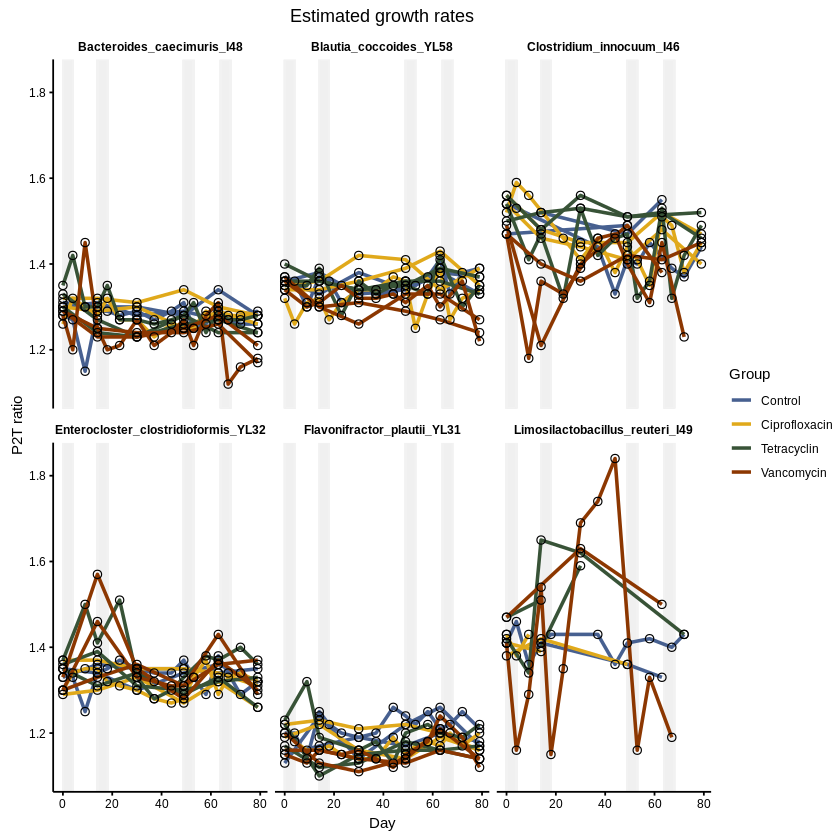

In [43]:
p <- ggplot(data = p2rdf, aes(x = day, y = ratio, group = paste0(mouse.id, bug), color = mouse.group))

p <- p + facet_wrap(bug ~ .)
p <- p + geom_rect(xmin = 0, xmax = 4,ymin = -Inf, ymax = Inf, color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 14, xmax = 18,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 49, xmax = 53,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 64, xmax = 68,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_line(size = 1) + geom_point(size = 2, color = "black", shape = 21)
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p <- p + theme(aspect.ratio = .5)
p <- p + xlab("Day") + ylab("P2T ratio")
p <- p + ggtitle(paste0("Estimated growth rates"))
p <- p + theme_pmuench(base_size = 9)
p

In [44]:
p2rdf$phase <- NULL
p2rdf$phase_num <- NULL
head(p2rdf)
p2rdf_agg <- aggregate(ratio ~ bug + day + mouse.group,
                            FUN = "mean",
                            data = p2rdf)

head(p2rdf_agg)

,ratio,bug,mouse.id,mouse.group,day
,<dbl>,<chr>,<chr>,<chr>,<int>
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwBacteroides_caecimuris_I48,1.30,Bacteroides_caecimuris_I48,1681,Control,0
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwBlautia_coccoides_YL58,1.36,Blautia_coccoides_YL58,1681,Control,0
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwEnterocloster_clostridioformis_YL32,1.33,Enterocloster_clostridioformis_YL32,1681,Control,0
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwFlavonifractor_plautii_YL31,1.13,Flavonifractor_plautii_YL31,1681,Control,0
pipeline_data/bw/coverage_from_pipeline_270721//1681d14_S57.lofreq.bam.bwBacteroides_caecimuris_I48,1.31,Bacteroides_caecimuris_I48,1681,Control,14
pipeline_data/bw/coverage_from_pipeline_270721//1681d14_S57.lofreq.bam.bwBlautia_coccoides_YL58,1.38,Blautia_coccoides_YL58,1681,Control,14


,bug,day,mouse.group,ratio
,<chr>,<int>,<chr>,<dbl>
1,Bacteroides_caecimuris_I48,0,Ciprofloxacin,1.293333
2,Blautia_coccoides_YL58,0,Ciprofloxacin,1.336667
3,Clostridium_innocuum_I46,0,Ciprofloxacin,1.540000
4,Enterocloster_clostridioformis_YL32,0,Ciprofloxacin,1.320000
5,Flavonifractor_plautii_YL31,0,Ciprofloxacin,1.205000
6,Limosilactobacillus_reuteri_I49,0,Ciprofloxacin,1.406667


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


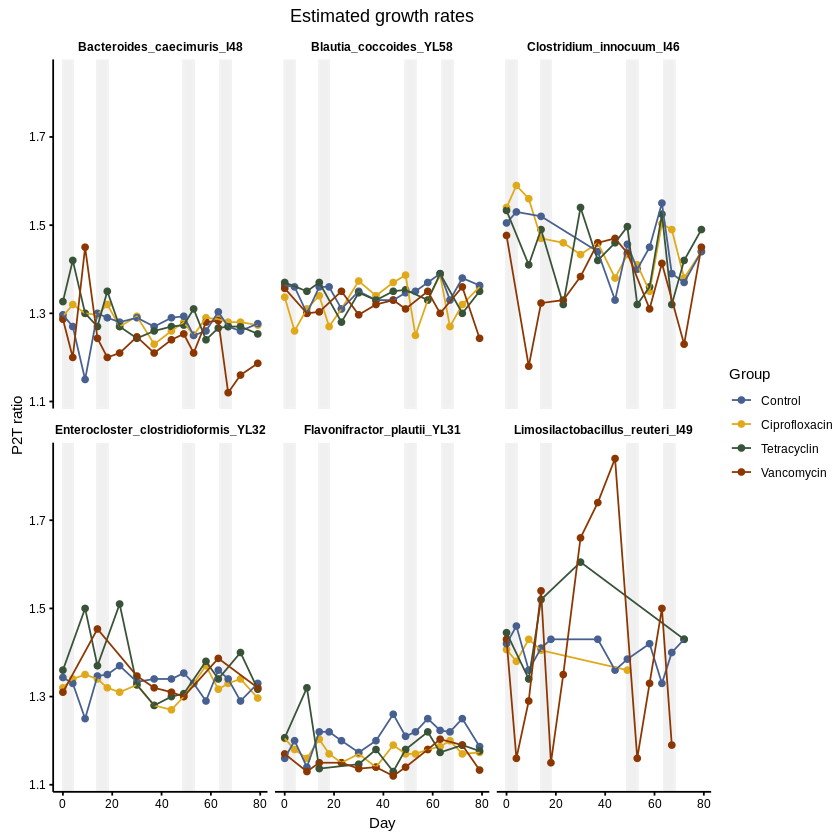

In [45]:
p <- ggplot(data = p2rdf_agg, aes(x = day, y = ratio, color = mouse.group))
p <- p + facet_wrap(bug ~ .)
p <- p + geom_rect(xmin = 0, xmax = 4,ymin = -Inf, ymax = Inf, color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 14, xmax = 18,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 49, xmax = 53,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 64, xmax = 68,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_point() + geom_line()
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p <- p + theme(aspect.ratio = .5)
p <- p + xlab("Day") + ylab("P2T ratio")
p <- p + ggtitle(paste0("Estimated growth rates"))
p <- p + theme_pmuench(base_size = 9)
p

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


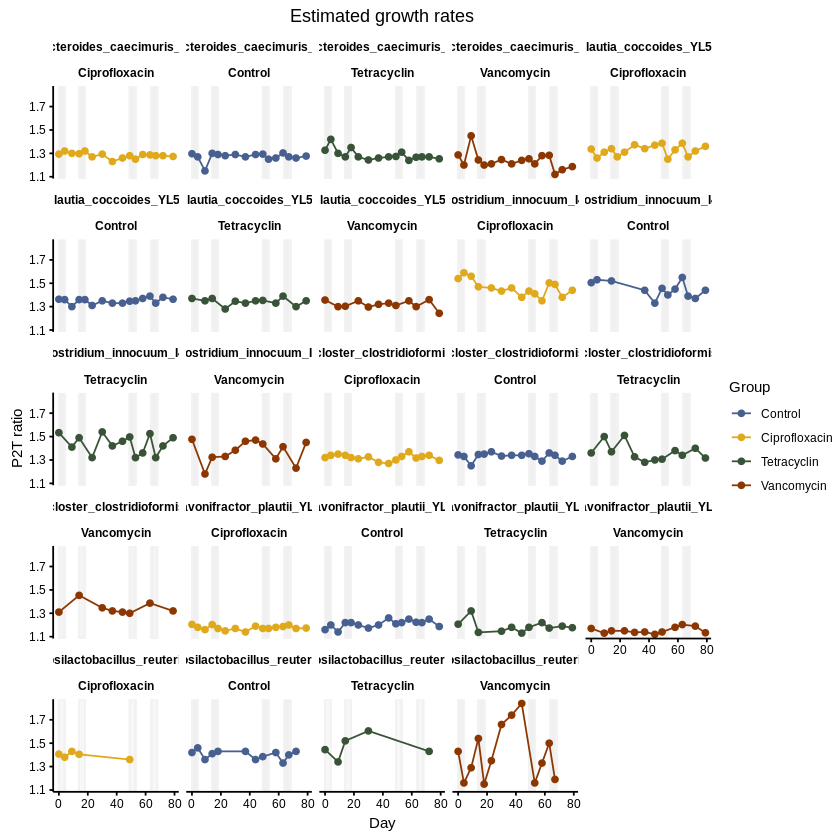

In [46]:
p <- ggplot(data = p2rdf_agg, aes(x = day, y = ratio, color = mouse.group))
p <- p + facet_wrap(bug ~ mouse.group)
p <- p + geom_rect(xmin = 0, xmax = 4,ymin = -Inf, ymax = Inf, color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 14, xmax = 18,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 49, xmax = 53,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 64, xmax = 68,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_point() + geom_line()
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p <- p + theme(aspect.ratio = .5)
p <- p + xlab("Day") + ylab("P2T ratio")
p <- p + ggtitle(paste0("Estimated growth rates"))
p <- p + theme_pmuench(base_size = 9)
p

In [47]:
options(repr.plot.width = 17, repr.plot.height = 3)

,bug,day,mouse.group,ratio,alpha
,<chr>,<int>,<chr>,<dbl>,<chr>
85,Bacteroides_caecimuris_I48,0,Control,1.296667,b
86,Blautia_coccoides_YL58,0,Control,1.363333,b
87,Clostridium_innocuum_I46,0,Control,1.505000,b
88,Enterocloster_clostridioformis_YL32,0,Control,1.343333,b
89,Flavonifractor_plautii_YL31,0,Control,1.160000,b
90,Limosilactobacillus_reuteri_I49,0,Control,1.420000,b


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


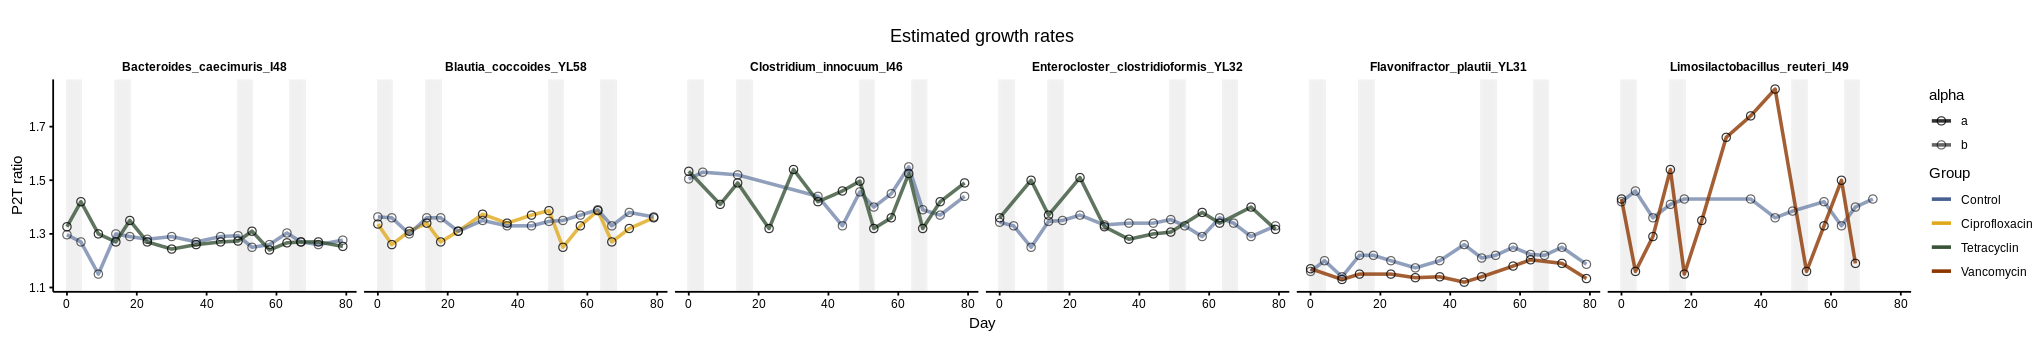

In [61]:
p2rdf_agg_lim <- p2rdf_agg[which(p2rdf_agg$mouse.group == "Control"),]
p2rdf_agg_lim <- rbind(p2rdf_agg_lim, p2rdf_agg[which(p2rdf_agg$bug == "Limosilactobacillus_reuteri_I49" & p2rdf_agg$mouse.group == "Vancomycin"),])
p2rdf_agg_lim <- rbind(p2rdf_agg_lim, p2rdf_agg[which(p2rdf_agg$bug == "Enterocloster_clostridioformis_YL32" & p2rdf_agg$mouse.group == "Tetracyclin"),])
p2rdf_agg_lim <- rbind(p2rdf_agg_lim, p2rdf_agg[which(p2rdf_agg$bug == "Blautia_coccoides_YL58" & p2rdf_agg$mouse.group == "Ciprofloxacin"),])
p2rdf_agg_lim <- rbind(p2rdf_agg_lim, p2rdf_agg[which(p2rdf_agg$bug == "Bacteroides_caecimuris_I48" & p2rdf_agg$mouse.group == "Tetracyclin"),])
p2rdf_agg_lim <- rbind(p2rdf_agg_lim, p2rdf_agg[which(p2rdf_agg$bug == "Clostridium_innocuum_I46" & p2rdf_agg$mouse.group == "Tetracyclin"),])
p2rdf_agg_lim <- rbind(p2rdf_agg_lim, p2rdf_agg[which(p2rdf_agg$bug == "Flavonifractor_plautii_YL31" & p2rdf_agg$mouse.group == "Vancomycin"),])

p2rdf_agg_lim$alpha <- "a"
p2rdf_agg_lim[which(p2rdf_agg_lim$mouse.group == "Control"),]$alpha <- "b"

head(p2rdf_agg_lim)

p <- ggplot(data = p2rdf_agg_lim, aes(x = day, y = ratio, color = mouse.group, alpha = alpha))
p <- p + facet_wrap(bug ~., nrow = 1)
p <- p + geom_rect(xmin = 0, xmax = 4,ymin = -Inf, ymax = Inf, color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 14, xmax = 18,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 49, xmax = 53,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_rect(xmin = 64, xmax = 68,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
p <- p + geom_line(size = 1) + geom_point(size = 2, color = "black", shape = 21)
p <- p + scale_alpha_manual(values = c("a"= .8, "b" = .6))
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p <- p + xlab("Day") + ylab("P2T ratio")
p <- p + ggtitle(paste0("Estimated growth rates"))
p <- p + theme_pmuench(base_size = 9)
p <- p + theme(aspect.ratio = .7)
p

In [62]:
pdf("R/figures/Figure3_paneld.pdf", width = 9, height = 5.5)
print(p)
dev.off()

png 
  2

In [254]:
library(OligoMMR2)

In [256]:
data(oligomm_ab_qpcr)
head(oligomm_ab_qpcr)

,mouse2,mouse,applicaiton,day,group,KB1,YL2,KB18,YL27,YL31,YL32,YL44,YL45,I46,I48,I49,YL58,universal
,<chr>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,1681,TRUE,0,water,25145275,115496.7,8249.76,30119882092,21284386688,16276780983,2.47245e+11,10988683360,5917554485,4.50190e+11,7185542948,18702211094,1.50806e+14
2,B,1682,TRUE,0,water,40467836,265611.7,18972.26,36521605839,33713710949,32784070073,2.66560e+11,14041371679,9209136350,6.08440e+11,20167515328,29843369343,1.21385e+14
3,C,1683,TRUE,0,water,93063435,201342.6,14381.62,44539863510,31912805014,11736836490,3.58821e+11,16495713092,15920448468,7.26128e+11,660404000000,55915721448,1.69415e+14
4,D,1684,TRUE,0,water,22423763,119275.3,8519.67,14798661000,10632544000,5045346600,1.34355e+11,6491134033,6088153800,2.58572e+11,10649583333,18538794667,5.89305e+13
5,E,1685,TRUE,0,water,105916164,204923.5,14637.39,58813038261,22204922609,20960744348,1.64817e+11,14224616870,7252827391,5.47438e+11,18047903478,40940783478,1.03955e+14
6,A,1686,TRUE,0,Ciprofloxacin,58520384,149150.8,10653.63,21456408871,13956254032,3523155121,2.29160e+11,7647174919,12592589516,3.00326e+11,33292590726,35508545565,5.79451e+13


[1] "Bacteroides_caecimuris_I48"          "Blautia_coccoides_YL58"             
[3] "Enterocloster_clostridioformis_YL32" "Flavonifractor_plautii_YL31"        
[5] "Clostridium_innocuum_I46"            "Limosilactobacillus_reuteri_I49"

,mouse,day,qpcr
,<int>,<int>,<dbl>
1,1681,0,4.50190e+11
2,1682,0,6.08440e+11
3,1683,0,7.26128e+11
4,1684,0,2.58572e+11
5,1685,0,5.47438e+11
6,1686,0,3.00326e+11


,ratio,bug,mouse.id,mouse.group,day
,<dbl>,<chr>,<chr>,<chr>,<int>
pipeline_data/bw/coverage_from_pipeline_270721//1681d00_S56.lofreq.bam.bwBacteroides_caecimuris_I48,1.30,Bacteroides_caecimuris_I48,1681,Control,0
pipeline_data/bw/coverage_from_pipeline_270721//1681d14_S57.lofreq.bam.bwBacteroides_caecimuris_I48,1.31,Bacteroides_caecimuris_I48,1681,Control,14
pipeline_data/bw/coverage_from_pipeline_270721//1681d30_S58.lofreq.bam.bwBacteroides_caecimuris_I48,1.28,Bacteroides_caecimuris_I48,1681,Control,30
pipeline_data/bw/coverage_from_pipeline_270721//1681d49_S59.lofreq.bam.bwBacteroides_caecimuris_I48,1.29,Bacteroides_caecimuris_I48,1681,Control,49
pipeline_data/bw/coverage_from_pipeline_270721//1681d63_S60.lofreq.bam.bwBacteroides_caecimuris_I48,1.27,Bacteroides_caecimuris_I48,1681,Control,63
pipeline_data/bw/coverage_from_pipeline_270721//1681d79_S61.lofreq.bam.bwBacteroides_caecimuris_I48,1.29,Bacteroides_caecimuris_I48,1681,Control,79


,mouse,day,qpcr,ratio,bug,mouse.group
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,1681,0,4.50190e+11,1.30,Bacteroides_caecimuris_I48,Control
2,1681,14,5.21359e+11,1.31,Bacteroides_caecimuris_I48,Control
3,1681,30,1.73314e+11,1.28,Bacteroides_caecimuris_I48,Control
4,1681,49,3.21247e+11,1.29,Bacteroides_caecimuris_I48,Control
5,1681,63,5.12594e+11,1.27,Bacteroides_caecimuris_I48,Control
6,1681,79,4.76700e+11,1.29,Bacteroides_caecimuris_I48,Control



	Pearson's product-moment correlation

data:  both$ratio and both$qpcr
t = 0.79787, df = 110, p-value = 0.4267
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1112670  0.2577823
sample estimates:
       cor 
0.07585489 


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


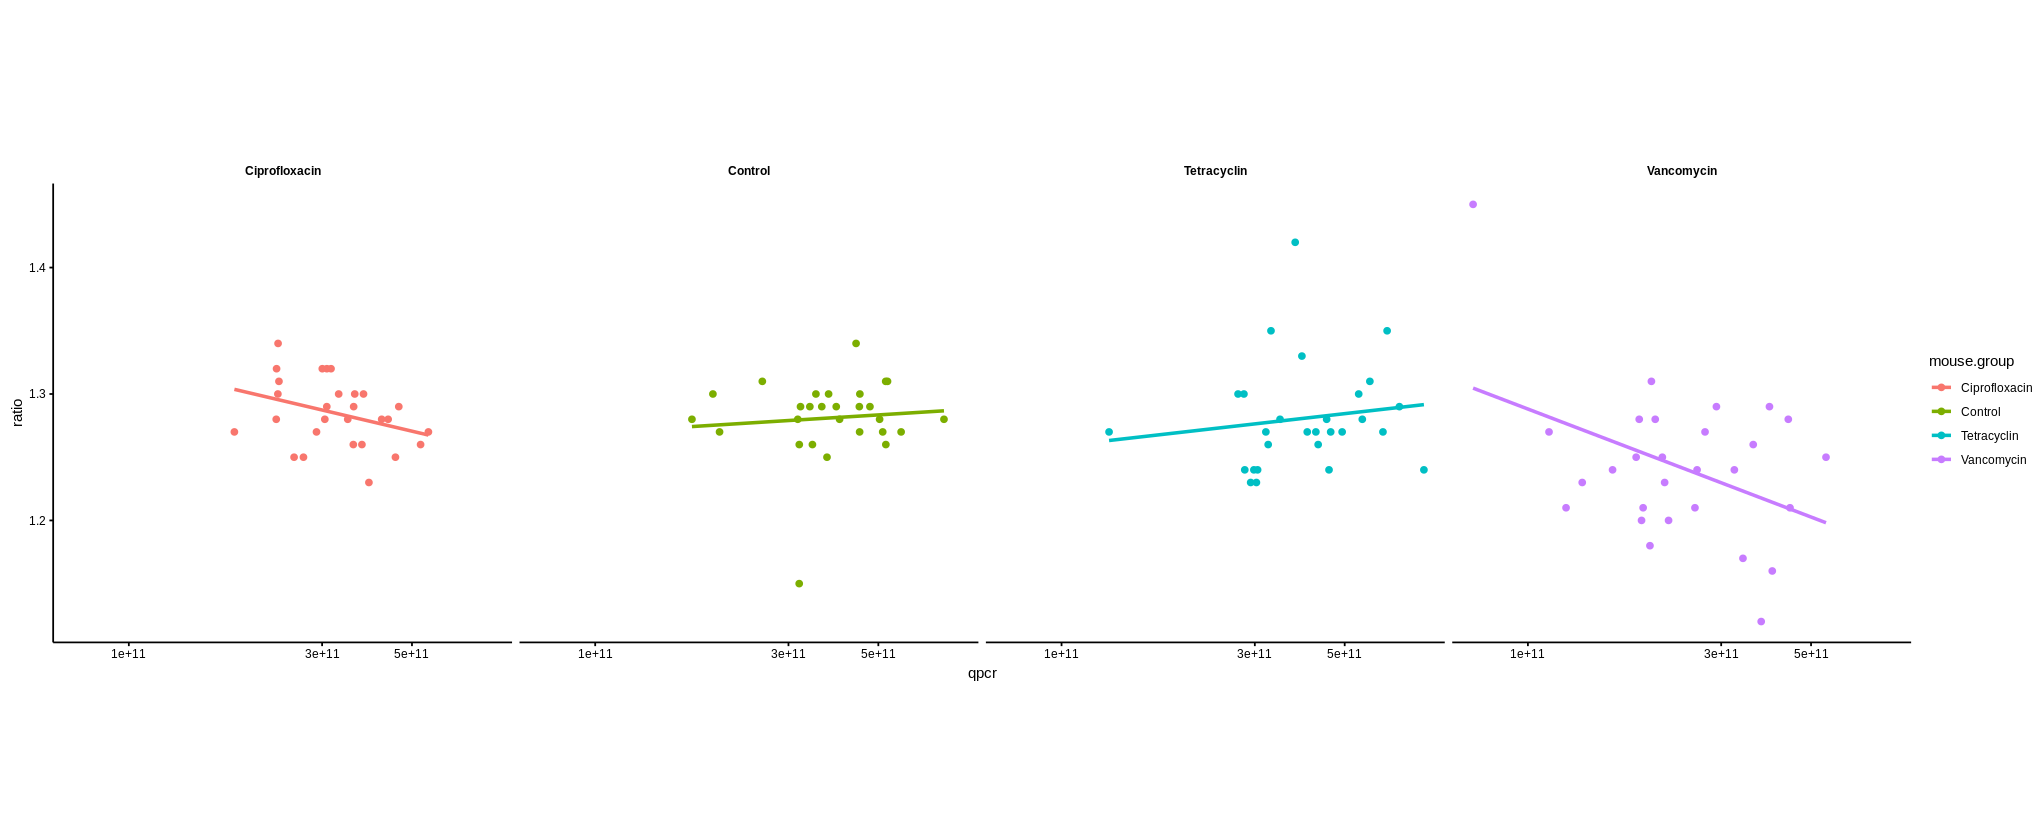

In [65]:
qpcr_sub <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$I48)

unique(p2rdf$bug)
head(qpcr_sub)

p2rdf_subset <- p2rdf[which(p2rdf$bug == "Bacteroides_caecimuris_I48"),]
head(p2rdf_subset)

both <- merge(qpcr_sub, p2rdf_subset, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
head(both)

cor.test(both$ratio, both$qpcr)

p <- ggplot(both, aes(x = qpcr, y = ratio, color = mouse.group))
p <- p + geom_point() + geom_smooth(method='lm', formula= y~x, se = F)
p <- p + scale_x_log10() + theme_pmuench(base_size = 9)
p <- p + facet_wrap(mouse.group ~., nrow = 1)
p <- p + theme(aspect.ratio = 1)
p

,mouse,day,qpcr,ratio,bug,mouse.group
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,1681,0,4.50190e+11,1.30,Bacteroides_caecimuris_I48,Control
2,1681,14,5.21359e+11,1.31,Bacteroides_caecimuris_I48,Control
3,1681,30,1.73314e+11,1.28,Bacteroides_caecimuris_I48,Control
4,1681,49,3.21247e+11,1.29,Bacteroides_caecimuris_I48,Control
5,1681,63,5.12594e+11,1.27,Bacteroides_caecimuris_I48,Control
6,1681,79,4.76700e+11,1.29,Bacteroides_caecimuris_I48,Control


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


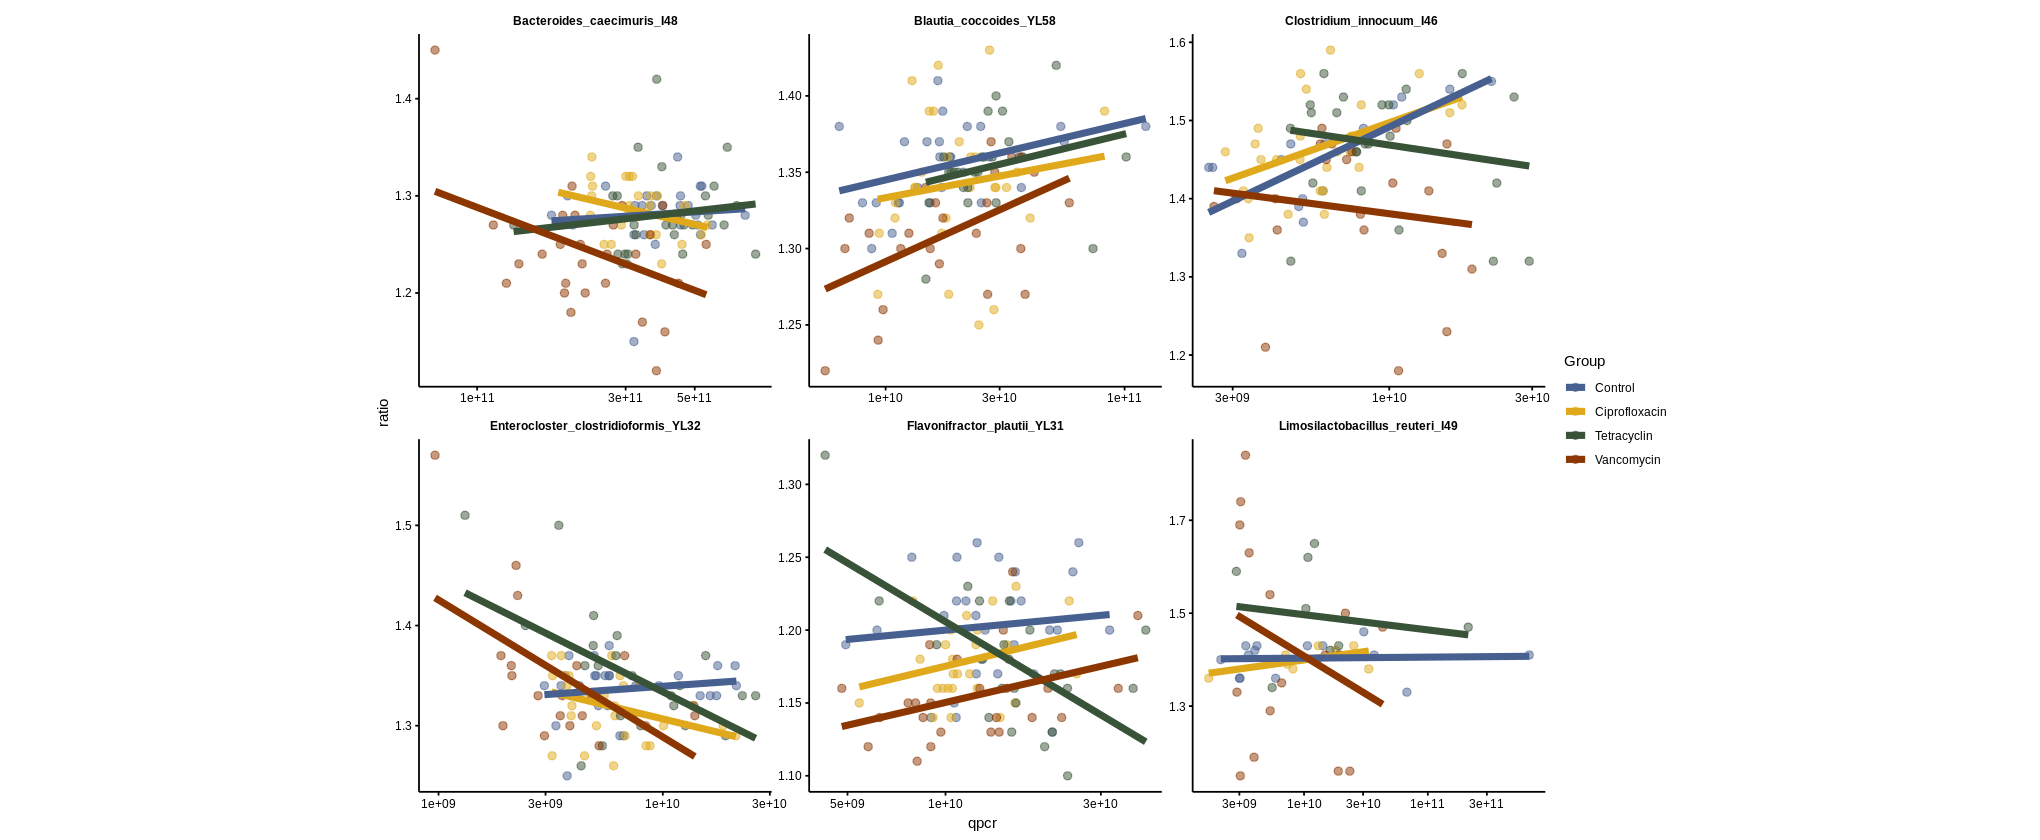

In [63]:
# I48
qpcr_sub_1 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$I48)
p2rdf_subset_1 <- p2rdf[which(p2rdf$bug == "Bacteroides_caecimuris_I48"),]
both_1 <- merge(qpcr_sub_1, p2rdf_subset_1, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_1$bug <- "Bacteroides_caecimuris_I48"

# Blautia_coccoides_YL58
qpcr_sub_2 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL58)
p2rdf_subset_2 <- p2rdf[which(p2rdf$bug == "Blautia_coccoides_YL58"),]
both_2 <- merge(qpcr_sub_2, p2rdf_subset_2, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_2$bug <- "Blautia_coccoides_YL58"


# Clostridium_innocuum_I46
qpcr_sub_3 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$I46)
p2rdf_subset_3 <- p2rdf[which(p2rdf$bug == "Clostridium_innocuum_I46"),]
both_3 <- merge(qpcr_sub_3, p2rdf_subset_3, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_3$bug <- "Clostridium_innocuum_I46	"

# Enterocloster_clostridioformis_YL32
qpcr_sub_4 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL32)
p2rdf_subset_4 <- p2rdf[which(p2rdf$bug == "Enterocloster_clostridioformis_YL32"),]
both_4 <- merge(qpcr_sub_4, p2rdf_subset_4, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_4$bug <- "Enterocloster_clostridioformis_YL32"

# Flavonifractor_plautii_YL31
qpcr_sub_5 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL31)
p2rdf_subset_5 <- p2rdf[which(p2rdf$bug == "Flavonifractor_plautii_YL31"),]
both_5 <- merge(qpcr_sub_5, p2rdf_subset_5, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_5$bug <- "Flavonifractor_plautii_YL31"


# Limosilactobacillus_reuteri_I49
qpcr_sub_6 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$I49)
p2rdf_subset_6 <- p2rdf[which(p2rdf$bug == "Limosilactobacillus_reuteri_I49"),]
both_6 <- merge(qpcr_sub_6, p2rdf_subset_6, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_6$bug <- "Limosilactobacillus_reuteri_I49"



all <- rbind(both_1, both_2, both_3, both_4, both_5, both_6)
head(all)

options(repr.plot.width = 17, repr.plot.height = 7)

p <- ggplot(all, aes(x = qpcr, y = ratio, color = mouse.group))
p <- p + geom_point(size = 2, alpha = .5) + geom_smooth(method='lm', formula= y~x, se = F, size = 2)
p <- p + scale_x_log10() + theme_pmuench(base_size = 9)
p <- p + facet_wrap(. ~ bug, scales = "free")
p <- p + theme(aspect.ratio = 1)
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p

In [64]:
pdf("correlation.pdf", width = 10, height = 10)
print(p)
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x9”


png 
  2

,mouse,day,qpcr,ratio,bug,mouse.group,phase,phase_num
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1681,0,4.50190e+11,1.30,Bacteroides_caecimuris_I48,Control,pre-treatment,1
2,1681,14,5.21359e+11,1.31,Bacteroides_caecimuris_I48,Control,short-recovery,2
3,1681,30,1.73314e+11,1.28,Bacteroides_caecimuris_I48,Control,short-recovery,4
4,1681,49,3.21247e+11,1.29,Bacteroides_caecimuris_I48,Control,long-recovery,3
5,1681,63,5.12594e+11,1.27,Bacteroides_caecimuris_I48,Control,short-recovery,6
6,1681,79,4.76700e+11,1.29,Bacteroides_caecimuris_I48,Control,short-recovery,8


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


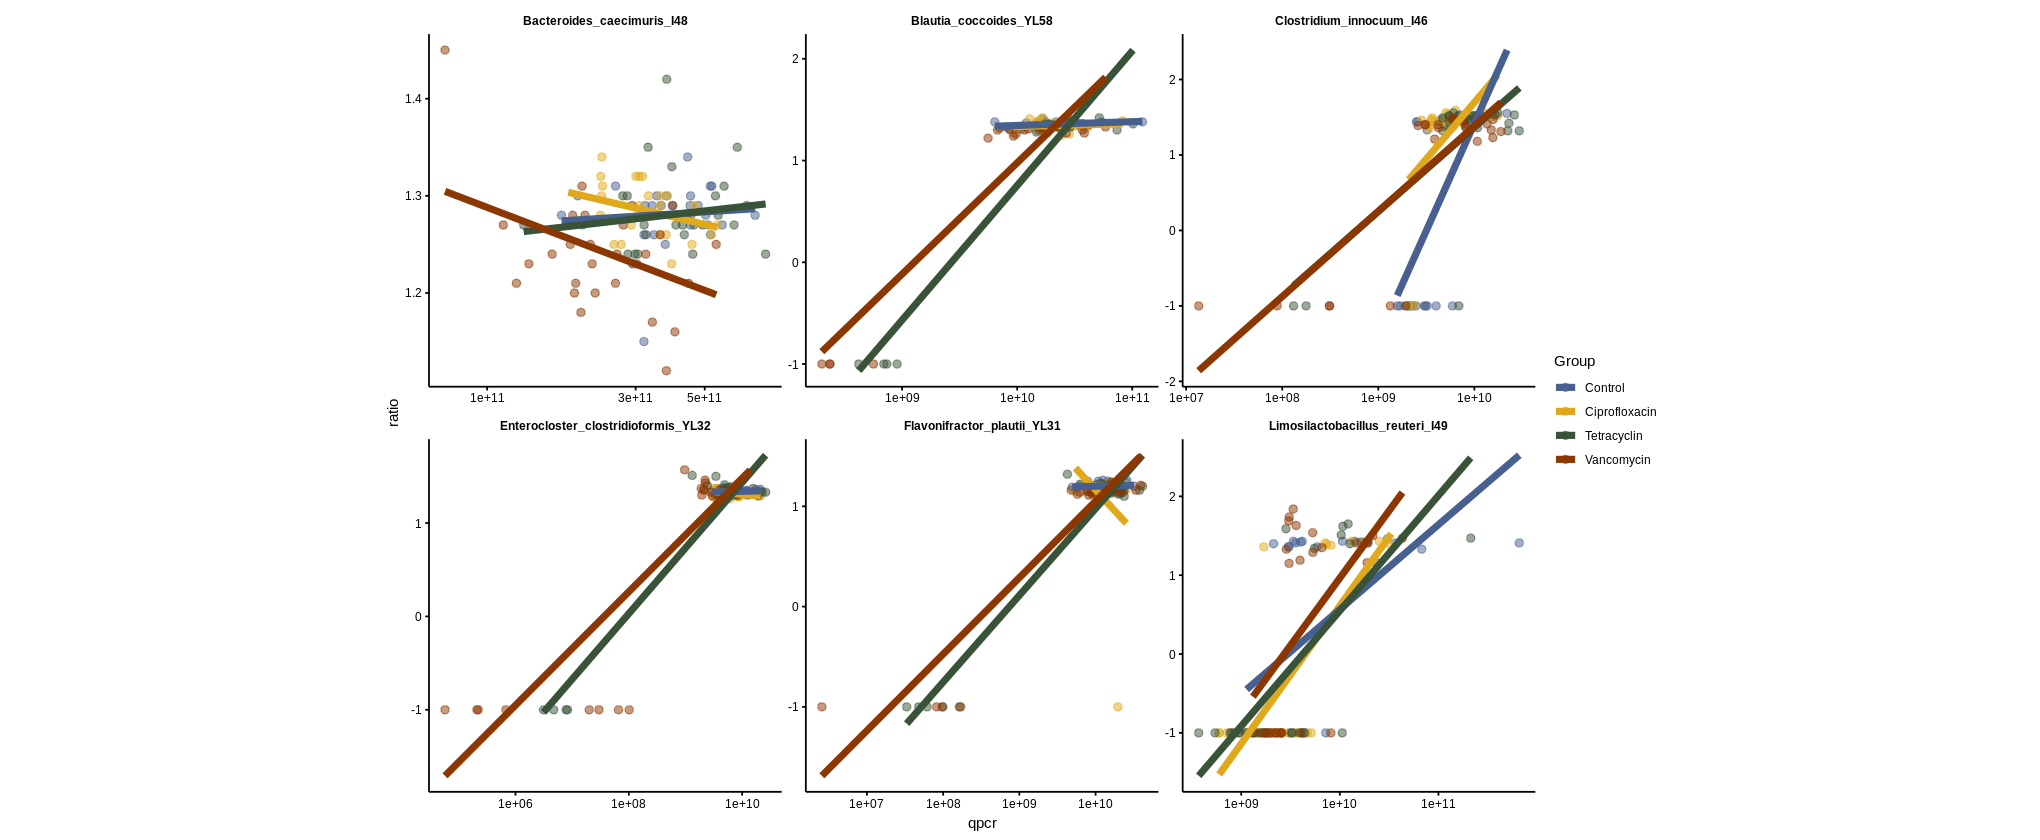

In [ ]:
p2r <- list()
files <- list.files("pipeline_data/bw/coverage_from_pipeline_270721/", full.names = T)


bugs <- c("Akkermansia_muciniphila_YL44", "Bacteroides_caecimuris_I48", "Blautia_coccoides_YL58", "Clostridium_innocuum_I46",
          "Enterocloster_clostridioformis_YL32", "Flavonifractor_plautii_YL31", "Limosilactobacillus_reuteri_I49")

for (sample in files){
    message(sample)
    bw_file <- file.path(sample)
    bw <- import(bw_file, format = "bw", as = "NumericList")
    
    for (bug in bugs){
        elem <- bw[[bug]]
        b <- elem[seq(1, length(elem), 50)]
        df <- data.frame(chr = bug,
                         start = 1:length(b) * 50L - 50L + 1,
                         end =  1:length(b) * 50L,
                         width = 50,
                         cov = b)

        cov_reduced <- data.frame(start = rollapply(df$start,
                                                      width = first_smoothing,
                                                      by = first_smoothing,
                                                      FUN = min, align = "left"),
                                    end = rollapply(df$end,
                                                   width = first_smoothing,
                                                   by = first_smoothing,
                                                   FUN = max, align = "left"),
                                    cov = rollapply(df$cov,
                                                    width = first_smoothing,
                                                    by = first_smoothing,
                                                    FUN = median, align = "left"))
        cov_reduced2 <- data.frame(start = rollapply(df$start,
                                                       width = cov_smoothing,
                                                       by = cov_smoothing,
                                                       FUN = min, align = "left"),
                                     end =rollapply(df$end,
                                                    width = cov_smoothing,
                                                    by = cov_smoothing,
                                                    FUN = max, align = "left"),
                                     cov = rollapply(df$cov,
                                                     width = cov_smoothing,
                                                     by = cov_smoothing,
                                                     FUN = median, align = "left"))

        p <- ggplot(cov_reduced, aes(x = start, y = cov))
        p <- p + geom_smooth(formular = y ~ x + I(x^2), color = "red", size = 2)
        ld <- layer_data(p)
        ld <- ld[c(which.max(ld$y), which.min(ld$y)), ]
        if(median(cov_reduced2$cov) <= 10) {
            message("low coverage")
             p2r[[paste0(sample, bug)]] <-  data.frame(ratio = -1,
                                    bug = bug,
                                    mouse.id = substr(tools::file_path_sans_ext(basename(sample)), 1, 4),
                                    mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(sample)), 1, 4)),
                                    day = as.integer(substr(basename(sample), 6, 7)),
                                    phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(sample), 6, 7))))),
                                    phase_num = binDaysByPhaseGroup(as.integer(substr(basename(sample), 6, 7))))
        } else {
              p2r[[paste0(sample, bug)]] <- data.frame(ratio = round(max(ld$y) / min(ld$y), digits= 2),
                                    bug = bug,
                                    mouse.id = substr(tools::file_path_sans_ext(basename(sample)), 1, 4),
                                    mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(sample)), 1, 4)),
                                    day = as.integer(substr(basename(sample), 6, 7)),
                                    phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(sample), 6, 7))))),
                                    phase_num = binDaysByPhaseGroup(as.integer(substr(basename(sample), 6, 7))))
        }
    } 
    
  
}
p2rdf <- do.call("rbind", p2r)
head(p2rdf)

,mouse,day,qpcr,ratio,bug,mouse.group,phase,phase_num
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1681,0,4.50190e+11,1.30,Bacteroides_caecimuris_I48,Control,pre-treatment,1
2,1681,14,5.21359e+11,1.31,Bacteroides_caecimuris_I48,Control,short-recovery,2
3,1681,30,1.73314e+11,1.28,Bacteroides_caecimuris_I48,Control,short-recovery,4
4,1681,49,3.21247e+11,1.29,Bacteroides_caecimuris_I48,Control,long-recovery,3
5,1681,63,5.12594e+11,1.27,Bacteroides_caecimuris_I48,Control,short-recovery,6
6,1681,79,4.76700e+11,1.29,Bacteroides_caecimuris_I48,Control,short-recovery,8


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


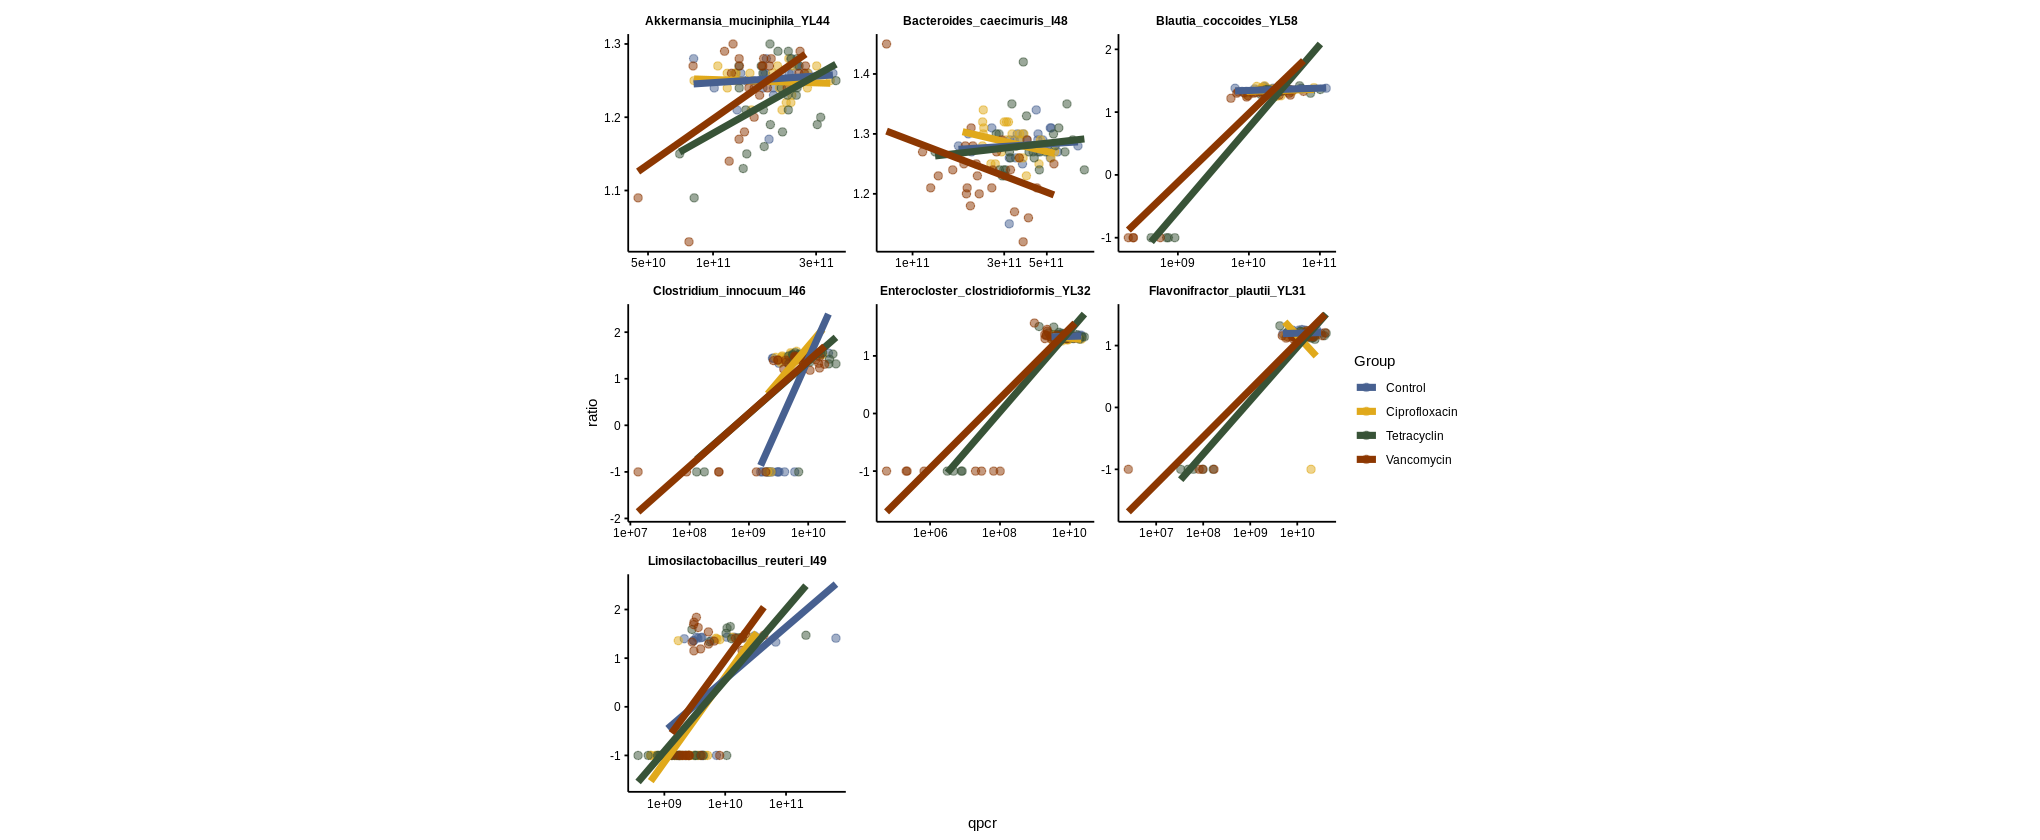

In [73]:

# Blautia_coccoides_YL58
qpcr_sub_2 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL58)
p2rdf_subset_2 <- p2rdf[which(p2rdf$bug == "Blautia_coccoides_YL58"),]
both_2 <- merge(qpcr_sub_2, p2rdf_subset_2, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_2$bug <- "Blautia_coccoides_YL58"


# Clostridium_innocuum_I46
qpcr_sub_3 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$I46)
p2rdf_subset_3 <- p2rdf[which(p2rdf$bug == "Clostridium_innocuum_I46"),]
both_3 <- merge(qpcr_sub_3, p2rdf_subset_3, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_3$bug <- "Clostridium_innocuum_I46	"

# Enterocloster_clostridioformis_YL32
qpcr_sub_4 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL32)
p2rdf_subset_4 <- p2rdf[which(p2rdf$bug == "Enterocloster_clostridioformis_YL32"),]
both_4 <- merge(qpcr_sub_4, p2rdf_subset_4, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_4$bug <- "Enterocloster_clostridioformis_YL32"

# Flavonifractor_plautii_YL31
qpcr_sub_5 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL31)
p2rdf_subset_5 <- p2rdf[which(p2rdf$bug == "Flavonifractor_plautii_YL31"),]
both_5 <- merge(qpcr_sub_5, p2rdf_subset_5, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_5$bug <- "Flavonifractor_plautii_YL31"


# Limosilactobacillus_reuteri_I49
qpcr_sub_6 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$I49)
p2rdf_subset_6 <- p2rdf[which(p2rdf$bug == "Limosilactobacillus_reuteri_I49"),]
both_6 <- merge(qpcr_sub_6, p2rdf_subset_6, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_6$bug <- "Limosilactobacillus_reuteri_I49"

# Akkermansia_muciniphila_YL44
qpcr_sub_7 <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL44)
p2rdf_subset_7 <- p2rdf[which(p2rdf$bug == "Akkermansia_muciniphila_YL44"),]
both_7 <- merge(qpcr_sub_7, p2rdf_subset_7, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both_7$bug <- "Akkermansia_muciniphila_YL44"


all <- rbind(both_1, both_2, both_3, both_4, both_5, both_6, both_7)
head(all)

options(repr.plot.width = 17, repr.plot.height = 7)

p <- ggplot(all, aes(x = qpcr, y = ratio, color = mouse.group))
p <- p + geom_point(size = 2, alpha = .5) + geom_smooth(method='lm', formula= y~x, se = F, size = 2)
p <- p + scale_x_log10() + theme_pmuench(base_size = 9)
p <- p + facet_wrap(. ~ bug, scales = "free")
p <- p + theme(aspect.ratio = 1)
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p

In [78]:
# Akkermansia_muciniphila_YL44
qpcr_sub <- data.frame(mouse = oligomm_ab_qpcr$mouse,
                       day = oligomm_ab_qpcr$day,
                       qpcr = oligomm_ab_qpcr$YL44)
p2rdf_subset <- p2rdf[which(p2rdf$bug == "Akkermansia_muciniphila_YL44"),]
both <- merge(qpcr_sub_7, p2rdf_subset_7, by.x = c("mouse", "day"), by.y = c("mouse.id", "day"))
both$bug <- "Akkermansia_muciniphila_YL44"
head(both)

,mouse,day,qpcr,ratio,bug,mouse.group,phase,phase_num
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1681,0,2.47245e+11,1.27,Akkermansia_muciniphila_YL44,Control,pre-treatment,1
2,1681,14,2.28350e+11,1.28,Akkermansia_muciniphila_YL44,Control,short-recovery,2
3,1681,30,1.29142e+11,1.21,Akkermansia_muciniphila_YL44,Control,short-recovery,4
4,1681,49,1.97180e+11,1.25,Akkermansia_muciniphila_YL44,Control,long-recovery,3
5,1681,63,1.33000e+11,1.25,Akkermansia_muciniphila_YL44,Control,short-recovery,6
6,1681,79,1.73871e+11,1.25,Akkermansia_muciniphila_YL44,Control,short-recovery,8


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


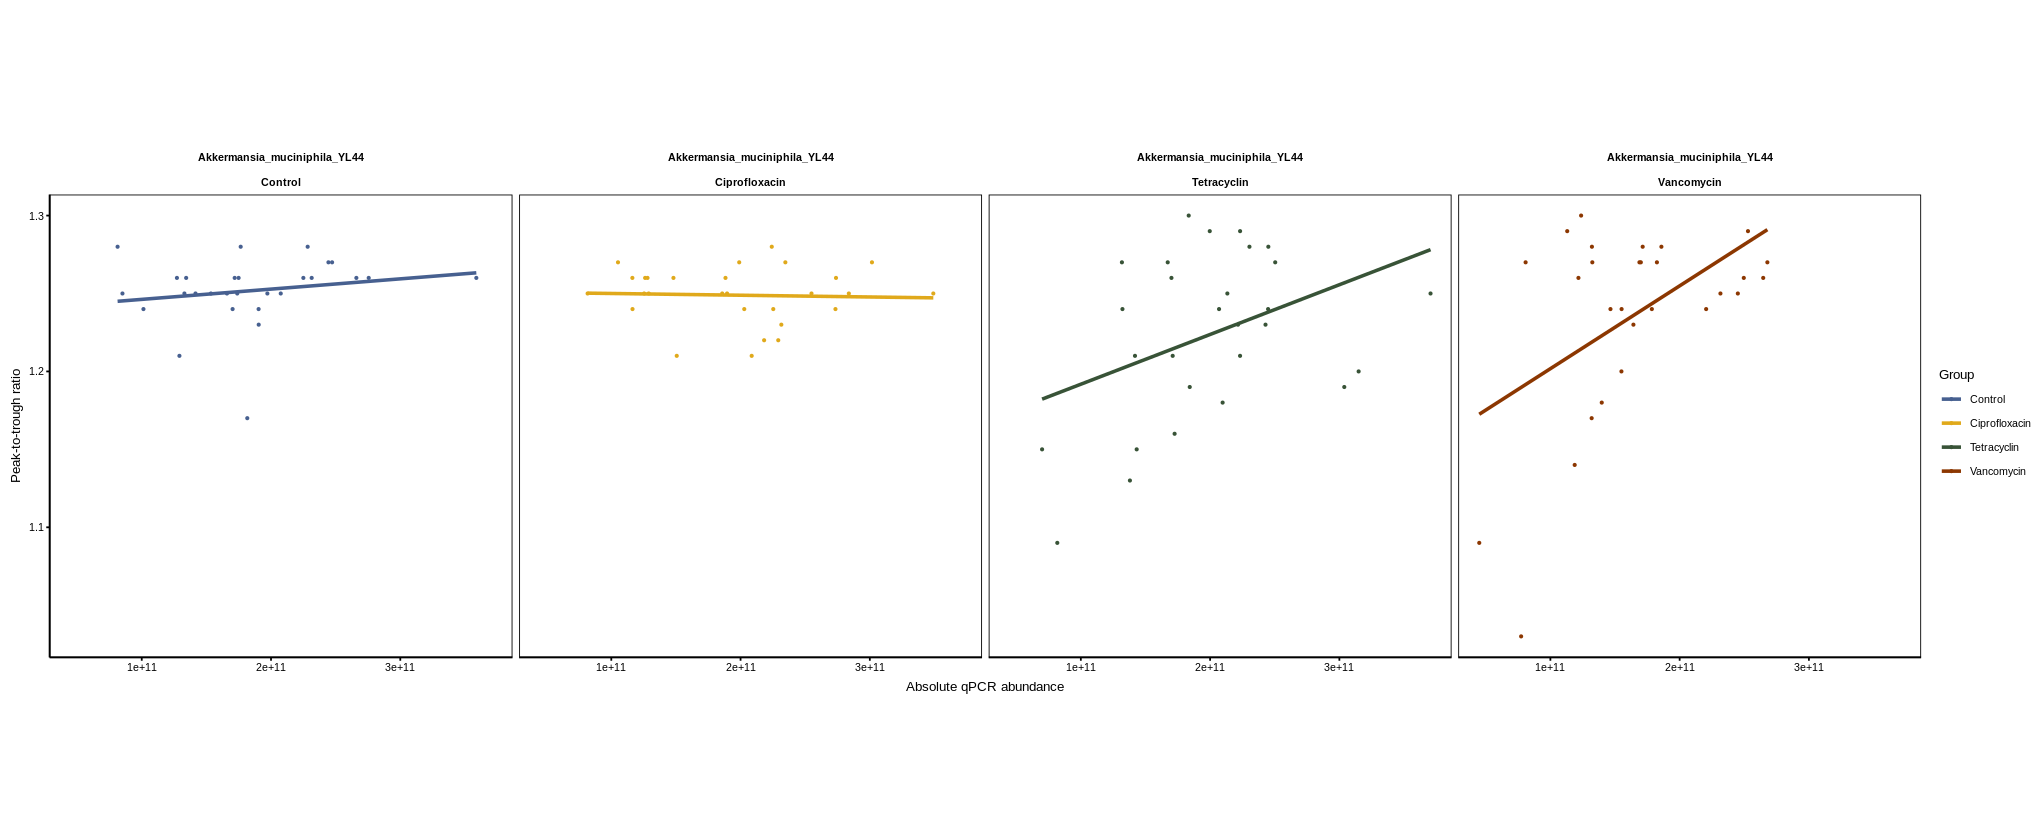

In [105]:
both$mouse.group <- factor(both$mouse.group, levels = c("Control", "Ciprofloxacin", "Tetracyclin", "Vancomycin"))

p <- ggplot(data = both, aes(x = qpcr, y = ratio, color = mouse.group)) + geom_point(size = .5)
p <- p + geom_smooth(method='lm', formula= y~x, se = F, size = 1)
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                          "Ciprofloxacin" = "#E0A91B",
                                                          "Tetracyclin" = "#385337",
                                                          "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                         "Ciprofloxacin" = "#E0A91B",
                                                         "Tetracyclin" = "#385337",
                                                         "Vancomycin" = "#8C3701"))
p <- p + theme_pmuench(base_size = 8)

p <- p + facet_wrap(~ bug + mouse.group, nrow = 1)
p <- p + xlab("Absolute qPCR abundance") + ylab("Peak-to-trough ratio")
p <- p + theme(aspect.ratio = 1, strip.background = element_blank(), strip.placement = "outside")
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))

p

In [106]:
pdf("A_muc_corr.pdf", width = 6, height = 4)
print(p)
dev.off()

png 
  2

In [107]:
?cor.test

cor.test {stats},R Documentation
"x, y",numeric vectors of data values. x and y must have the same length.
alternative,"indicates the alternative hypothesis and must be one of ""two.sided"", ""greater"" or ""less"". You can specify just the initial letter. ""greater"" corresponds to positive association, ""less"" to negative association."
method,"a character string indicating which correlation coefficient is to be used for the test. One of ""pearson"", ""kendall"", or ""spearman"", can be abbreviated."
exact,a logical indicating whether an exact p-value should be computed. Used for Kendall's tau and Spearman's rho. See ‘Details’ for the meaning of NULL (the default).
conf.level,confidence level for the returned confidence interval. Currently only used for the Pearson product moment correlation coefficient if there are at least 4 complete pairs of observations.
continuity,"logical: if true, a continuity correction is used for Kendall's tau and Spearman's rho when not computed exactly."
formula,"a formula of the form ~ u + v, where each of u and v are numeric variables giving the data values for one sample. The samples must be of the same length."
data,an optional matrix or data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector specifying a subset of observations to be used.
na.action,"a function which indicates what should happen when the data contain NAs. Defaults to getOption(""na.action"")."


In [113]:
both_control <- both[which(both$mouse.group == "Control"),]
both_ciprofloxacin <- both[which(both$mouse.group == "Ciprofloxacin"),]
both_tetracyclin <- both[which(both$mouse.group == "Tetracyclin"),]
both_vancomycin <- both[which(both$mouse.group == "Vancomycin"),]

cor.test(both_control$qpcr, both_control$ratio, method = "pearson")
cor.test(both_ciprofloxacin$qpcr, both_ciprofloxacin$ratio, method = "pearson")
cor.test(both_tetracyclin$qpcr, both_tetracyclin$ratio, method = "pearson")
cor.test(both_vancomycin$qpcr, both_vancomycin$ratio, method = "pearson")


	Pearson's product-moment correlation

data:  both_control$qpcr and both_control$ratio
t = 0.95705, df = 26, p-value = 0.3474
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2025447  0.5216478
sample estimates:
      cor 
0.1844718 



	Pearson's product-moment correlation

data:  both_ciprofloxacin$qpcr and both_ciprofloxacin$ratio
t = -0.21252, df = 26, p-value = 0.8334
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4083756  0.3366641
sample estimates:
        cor 
-0.04164325 



	Pearson's product-moment correlation

data:  both_tetracyclin$qpcr and both_tetracyclin$ratio
t = 2.1887, df = 26, p-value = 0.03779
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02504843 0.66905993
sample estimates:
      cor 
0.3944393 



	Pearson's product-moment correlation

data:  both_vancomycin$qpcr and both_vancomycin$ratio
t = 2.8997, df = 26, p-value = 0.007497
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1486806 0.7323498
sample estimates:
     cor 
0.494337 
